In [3]:
# data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
from pyfonts import load_font
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

# geospatial manipulation
import cartopy.crs as ccrs

# projection
proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/R-graph-gallery/master/DATA/world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
world = world.to_crs(proj.proj4_init)
df = pd.read_csv('data.csv')

def convert_lat_long(coord):
   try:
      if coord[-1] == 'N':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'S':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'E':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", ".").replace(":", "."))
      elif coord[-1] == 'W':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
   except:
      print(coord)
      return None
df['Latitude'] = df['Latitude'].apply(convert_lat_long)
df['Longitude'] = df['Longitude'].apply(convert_lat_long)

df = df[df['Latitude'].abs() <= 90]
df = df[df['Longitude'].abs() <= 180]
df = df[df['Magnitude'] <= 10]

def get_year(date):
   return date[-4:]
df['year'] = df['Date'].apply(get_year).astype(float)

df.to_csv('earthquakes.csv', index=False)
df.sample(10)

2.7.37 N


,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
14150,05/09/2016,22:54:10,Komandorskiye Ostrova Region,5.8,10,54.80,168.00,A,-,2016.0
13886,05/10/2016,16:06:04,Central Peru,5.2,130,-9.52,-74.48,A,-,2016.0
6139,16/10/2019,16:18:42,Banda Sea,4.8,116,-6.28,130.87,A,-,2019.0
6959,01/07/2019,16:59:25,"Mindanao, Philippines",5.8,439,9.17,124.25,A,-,2019.0
14716,04/12/2015,16:32:00,80 km NE of Muzaffarabad,3.0,10,34.70,74.10,A,-,2015.0
11560,02/12/2017,08:28:09,Tajikistan,4.6,30,39.10,71.00,M,-,2017.0
2190,10/12/2023,03:38:20,"Hindu Kush Region,Afghanistan",5.0,162,36.08,69.97,M,-,2023.0
13137,21/12/2016,00:17:29,Banda Sea,6.8,145,-7.80,127.90,M,-,2016.0
11211,31/01/2018,18:39:27,"20 Km Northeast of Bela, Baluchistan",4.5,17,26.38,66.30,M,-,2018.0
14407,04/08/2016,09:01:00,"Near North Coast of New Guinea, P.N.G",5.5,70,-4.20,144.00,A,-,2016.0


/Users/josephbarbier/Desktop/misc-viz/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


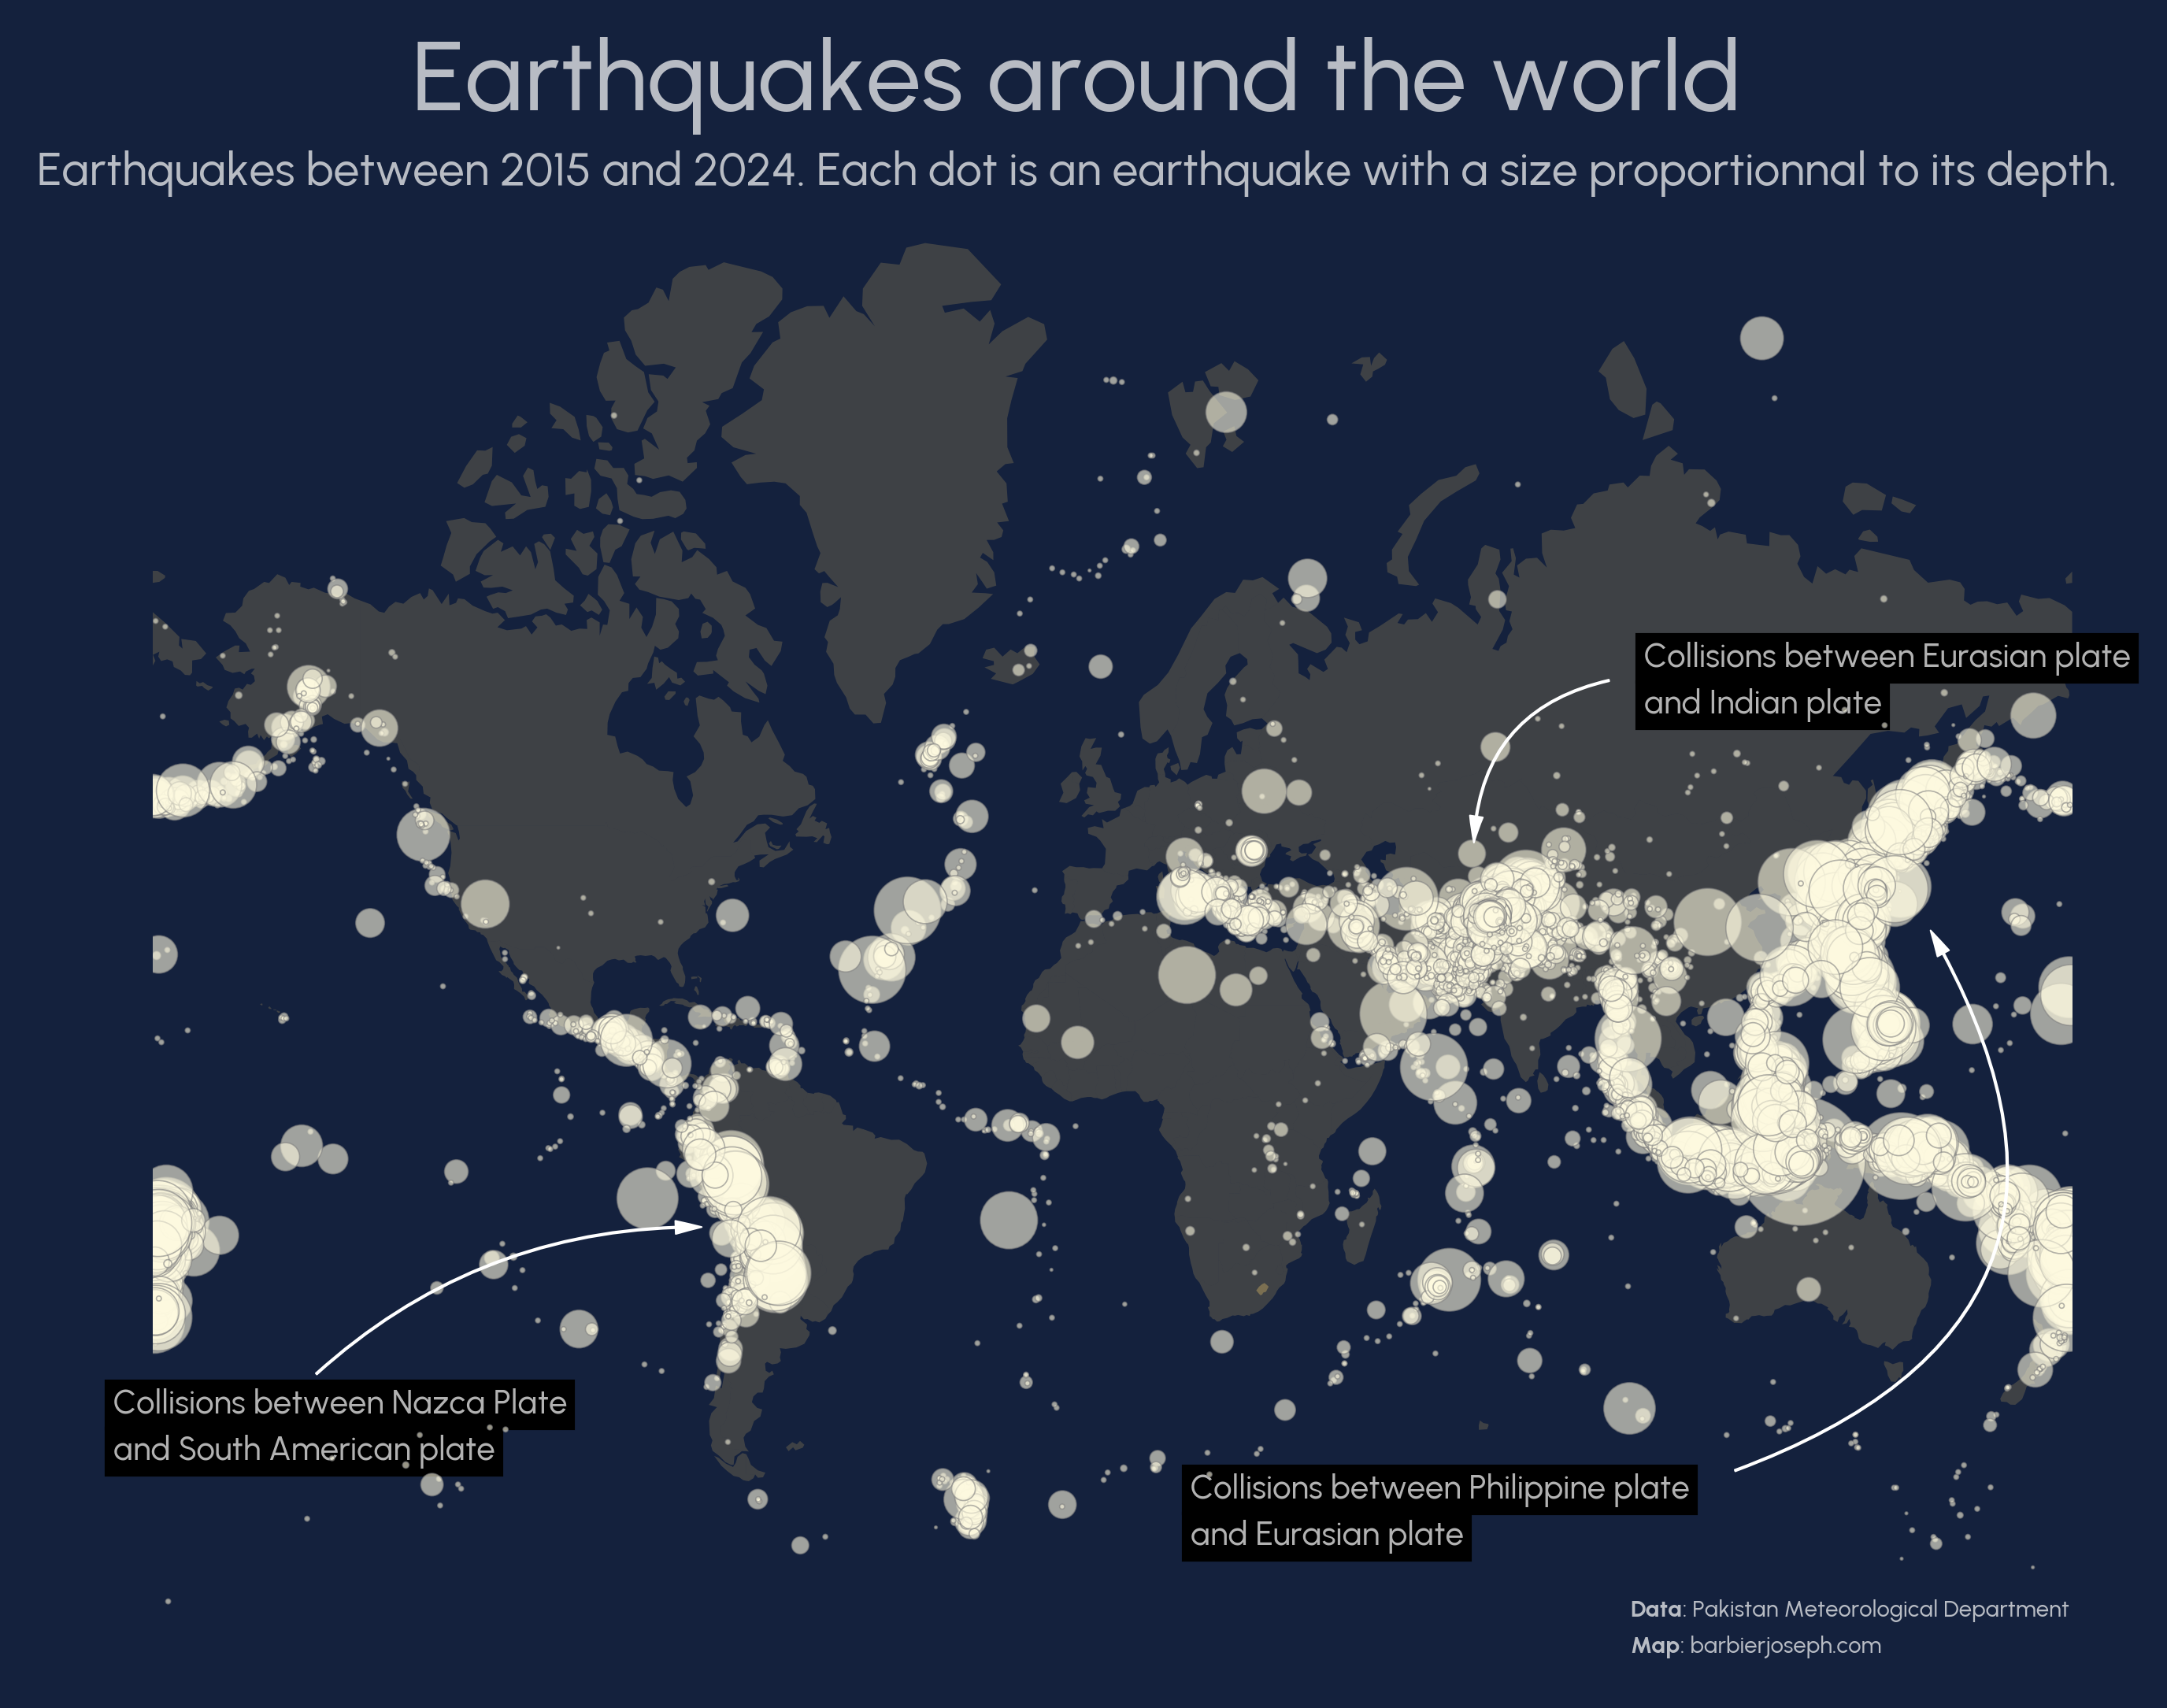

In [4]:
from json import load


def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
   if fig is None:
      fig = plt.gcf()
   kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      transform=fig.transFigure,
      **kw
   )
   fig.patches.append(a)

font = load_font(
   'https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Regular.ttf?raw=true'
)
bold_font = load_font(
   'https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Bold.ttf?raw=true'
)

# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7

# initialize the figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection': proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)'] * np.log(df['Depth (km)']) /10,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.98, s='Earthquakes around the world',
   color=text_color, fontsize=30, ha='center', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.5, y=0.92, s='Earthquakes between 2015 and 2024. Each dot is an earthquake with a size proportionnal to its depth.',
   color=text_color, fontsize=14, ha='center', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

# nazaca plate
highlight_textprops = [
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text},
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text}
]
draw_arrow((0.23, 0.27), (0.37, 0.35), fig=fig, color=text_color, invert=True, radius=0.2)
fig_text(x=0.16, y=0.265, s='<Collisions between Nazca Plate>\n<and South American plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# india plate
draw_arrow((0.69, 0.64), (0.64, 0.55), fig=fig, color=text_color, radius=0.4)
fig_text(x=0.7, y=0.66, s='<Collisions between Eurasian plate>\n<and Indian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# philippine plate
draw_arrow((0.73, 0.22), (0.8, 0.51), fig=fig, color=text_color, radius=0.6)
fig_text(x=0.54, y=0.22, s='<Collisions between Philippine plate>\n<and Eurasian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

plt.savefig('map.png', dpi=300, bbox_inches="tight")
plt.show()

/Users/josephbarbier/Desktop/misc-viz/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


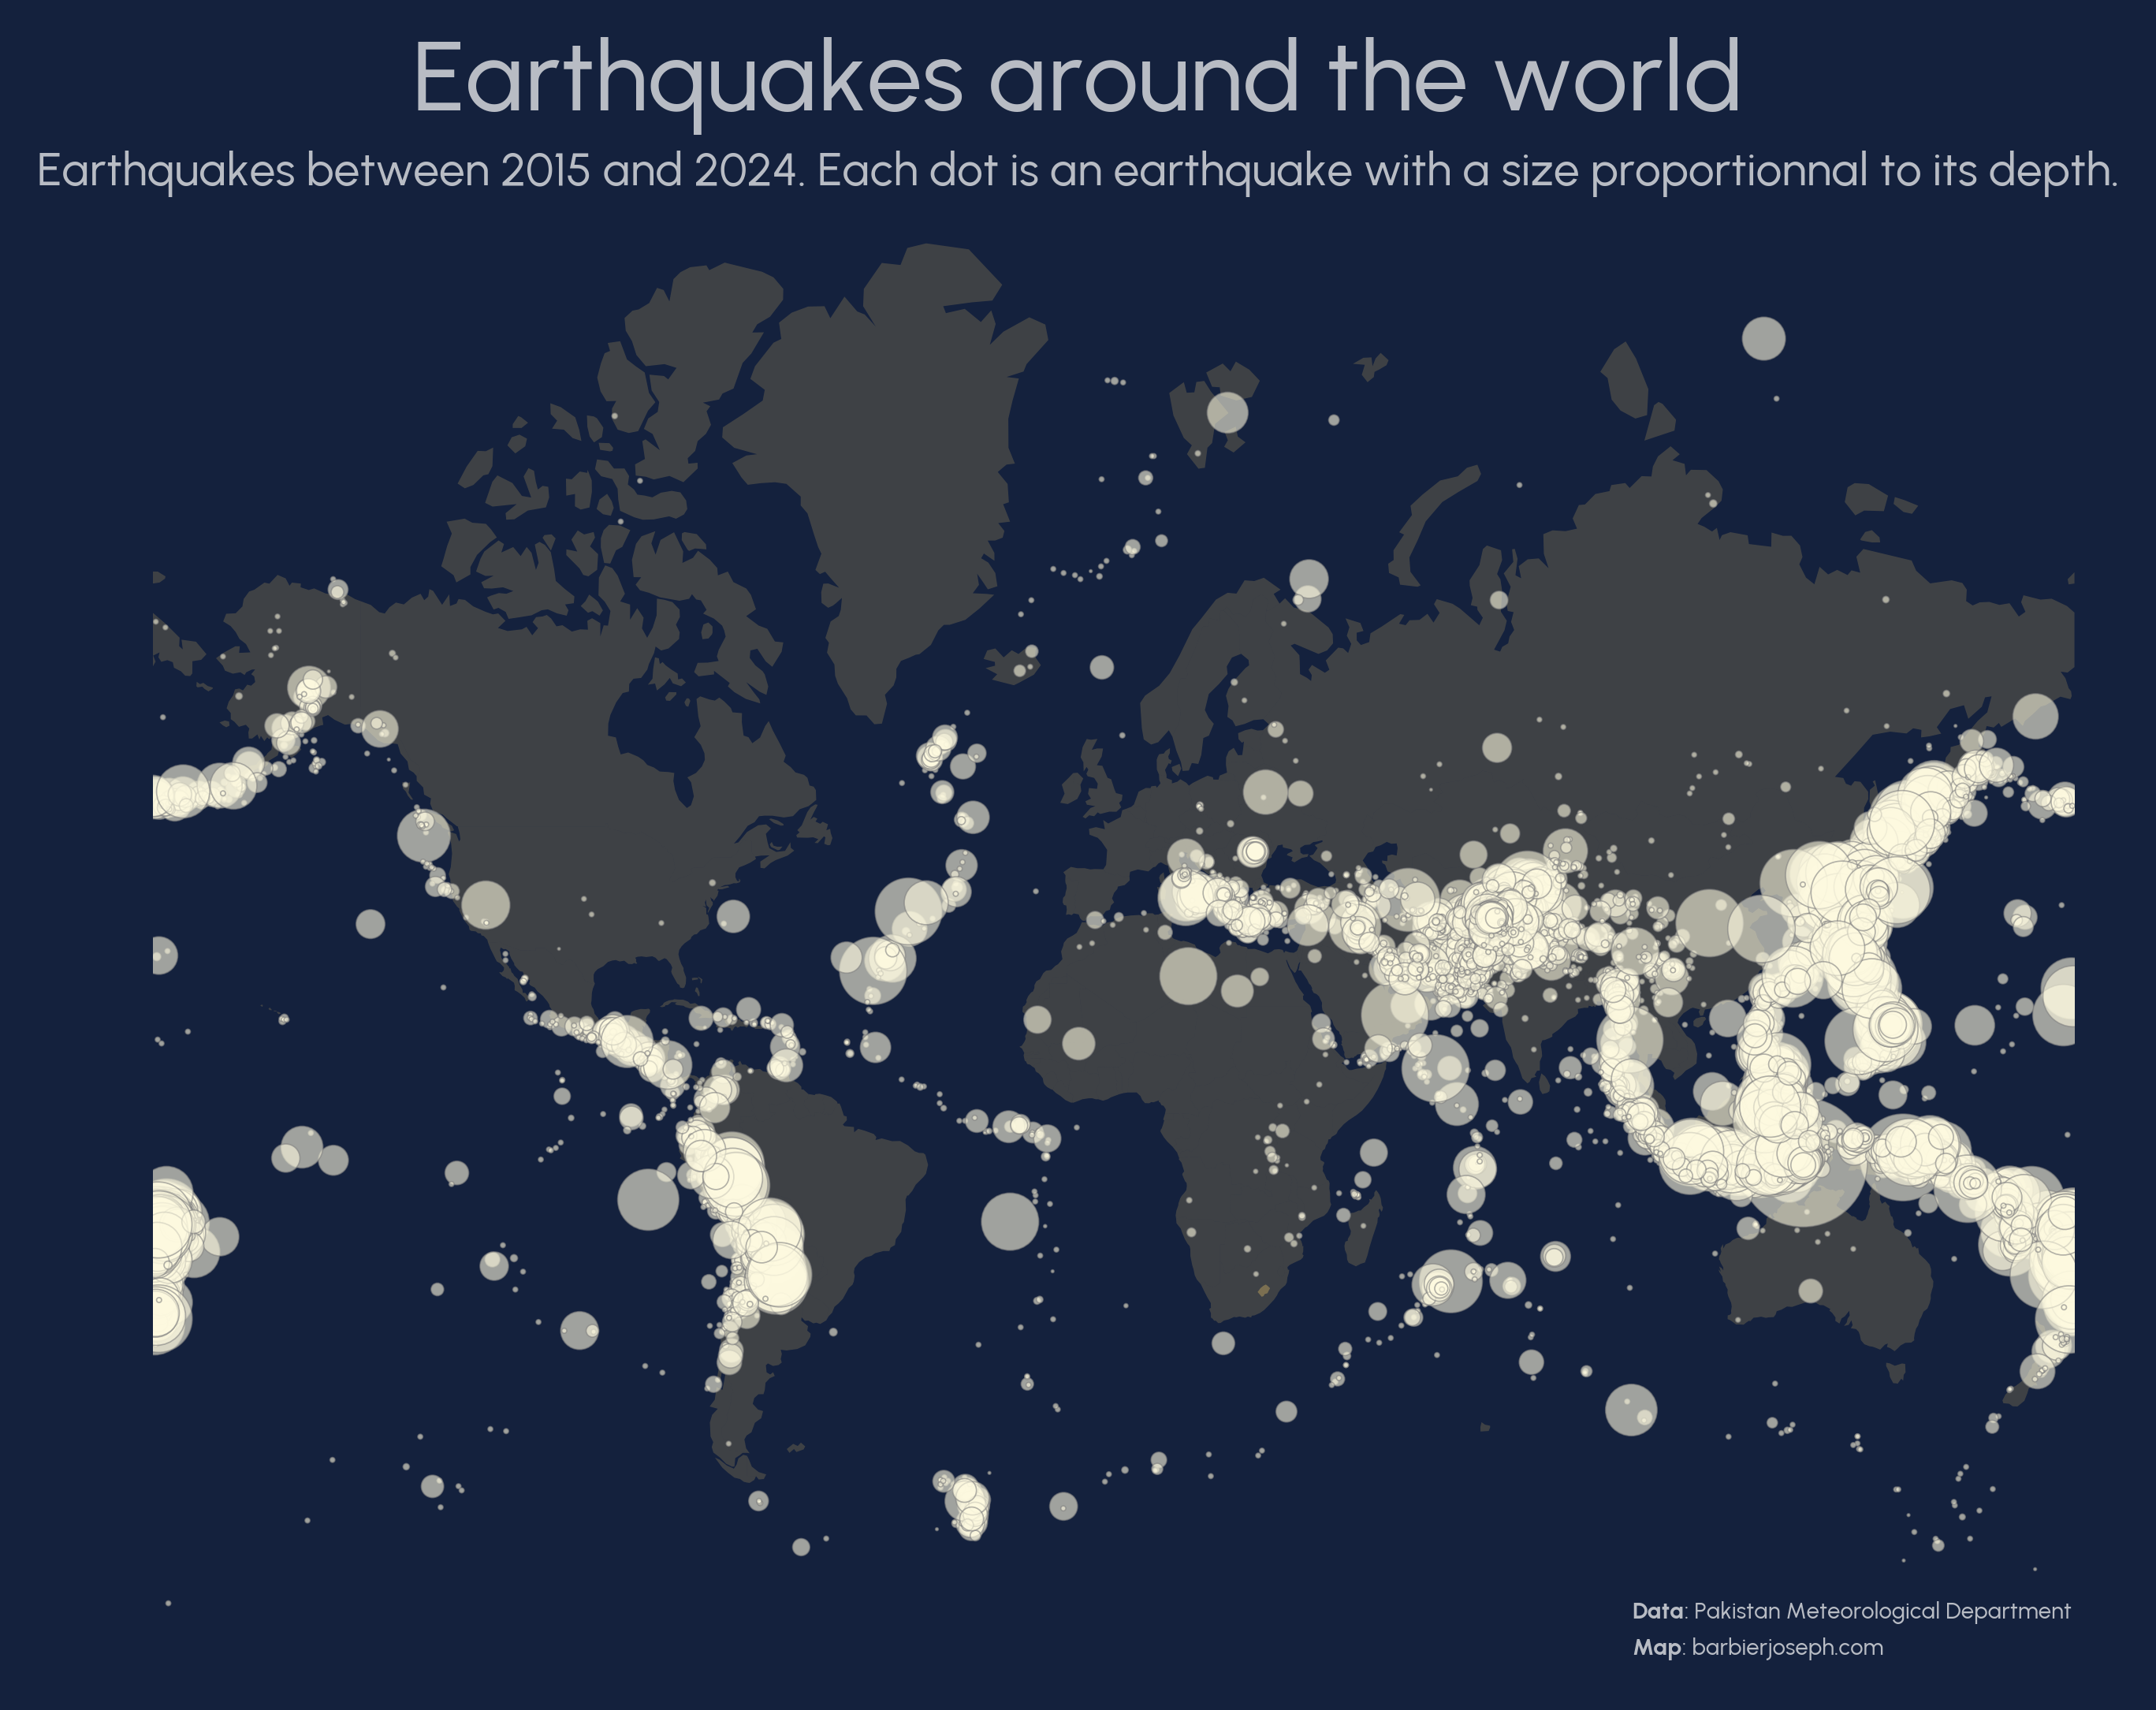

In [5]:
from json import load


def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
   if fig is None:
      fig = plt.gcf()
   kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      transform=fig.transFigure,
      **kw
   )
   fig.patches.append(a)

font = load_font(
   'https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Regular.ttf?raw=true'
)
bold_font = load_font(
   'https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Bold.ttf?raw=true'
)

# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7

# initialize the figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection': proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)'] * np.log(df['Depth (km)']) /10,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.98, s='Earthquakes around the world',
   color=text_color, fontsize=30, ha='center', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.5, y=0.92, s='Earthquakes between 2015 and 2024. Each dot is an earthquake with a size proportionnal to its depth.',
   color=text_color, fontsize=14, ha='center', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

plt.savefig('map-without-arrows.png', dpi=300, bbox_inches="tight")
plt.show()